<a href="https://colab.research.google.com/github/YihanMou0511/Asset-prices-forecasting/blob/main/Week_7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# 1.) Import an asset price from Yahoo Finance

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout



########################################
####Pick your ticker and time period####
########################################
stock_data = yf.download("BYND", start="1990-01-01", end="2022-02-21")



# Preprocess data
scaled_data = np.array(stock_data["Close"].pct_change().dropna()).reshape(-1,1)


# Split data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]



[*********************100%***********************]  1 of 1 completed


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [8]:
x_train = []
y_train = []


#############################################################
####Pick your input size and edit to make binary forecast####
#############################################################
input_size = 5
for i in range(input_size, len(train_data)):
    x_train.append(train_data[i-input_size:i, 0])
    y_train.append(train_data[i, 0]) 
    if y_train[i-input_size]>0:
      y_train[i-input_size]=1
    if y_train[i-input_size]<0:
      y_train[i-input_size]=0


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###################################
####Build Your RNN Architecture####
###################################
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
#Examples
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25,activation='relu')) #dropout percentage
#classification: pick activation function ;
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
mod=model.fit(x_train, y_train, batch_size=1, epochs=3)


Epoch 1/3
560/560 [==============================] - 13s 13ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/3
560/560 [==============================] - 6s 11ms/step - loss: 0.6942 - accuracy: 0.4625
Epoch 3/3
560/560 [==============================] - 7s 12ms/step - loss: 0.6935 - accuracy: 0.4875


# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [10]:

test_data = scaled_data[training_data_len:, :]
x_test = []
y_test = []

for i in range(input_size, len(test_data)):
    x_test.append(test_data[i-input_size:i, 0])
    y_test.append(test_data[i, 0]) 
    if y_test[i-input_size]>0:
      y_test[i-input_size]=1
    if y_test[i-input_size]<0:
      y_test[i-input_size]=0


x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

out_predictions = np.round(model.predict(x_test),0)

in_predictions=np.round(model.predict(x_train),0)

18/18 [==============================] - 0s 3ms/step


In [11]:
import matplotlib


In [12]:
in_acc=(len(y_train)-np.sum(np.abs(in_predictions.flatten()-y_train)))/len(y_train)
out_acc=(len(y_test)-np.sum(np.abs(out_predictions.flatten()-y_test)))/len(y_test)
in_acc_random=(len(y_train[1:])-np.sum(np.abs(y_train[:-1]-y_train[1:])))/len(y_train)
out_acc_random=(len(y_test[1:])-np.sum(np.abs(y_test[:-1]-y_test[1:])))/len(y_test)

<BarContainer object of 4 artists>

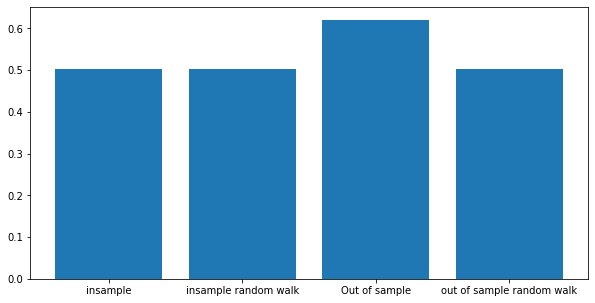

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(['insample', 'insample random walk', 'Out of sample', 'out of sample random walk'],
        [in_acc, in_acc_random, out_acc, out_acc_random])

# Dont Do 4.) Plot in and out of sample accuracy

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on full dataset

test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

train_predict = model.predict(x_train)
train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)



plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
end_val = np.cumprod(y_train+1)[-1]
test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# 5.) Write an observation/conclusion about the graphs from Q4 and Q3

From the barchart of Q3 we can see that in sample, in sample random walk and out of sample random walk accuracy are all about 0.5. The out of sample accuracy is about 0.6. The accuracy are all not so good. The model is not significantly better than random walk.

# 6.) Create a parameter for number of lags in your input layer. Do a 3-fold CV to test three different time lags. i.e. Tested using 5,10,20 days of previous price data to forecast

In [17]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Define the Keras model
###Edit here to create your optimizer
def get_data(params):
  input_siz=params['input_siz']
  x_train2=[]
  y_train2=[]
  for i in range(input_siz, len(train_data)):
    x_train2.append(train_data[i-input_siz:i, 0])
    y_train2.append(train_data[i, 0]) 
    if y_train2[i-input_siz]>0:
      y_train2[i-input_siz]=1
    if y_train2[i-input_siz]<0:
      y_train2[i-input_siz]=0
  x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
  x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
  return x_train2,y_train2

def create_model(input_siz):

    model = Sequential()
    model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return(model)

# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
####EXAMPLE###'batch_size': [10, 20, 100],'epochs': [10, 100],
params = {'batch_size': [10, 20],'input_siz':[5,10,20]}

# Perform the grid search over the hyperparameters

grid = GridSearchCV(estimator=model, param_grid=params, cv=3,pre_dispatch=get_data)
grid_result = grid.fit(x_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-17-4bea3fcadf8f>:34: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -0.693119 using {'batch_size': 10, 'input_siz': 5}


The best parameters are batch_size=10, input_size=5.